[*********************100%%**********************]  1 of 1 completed


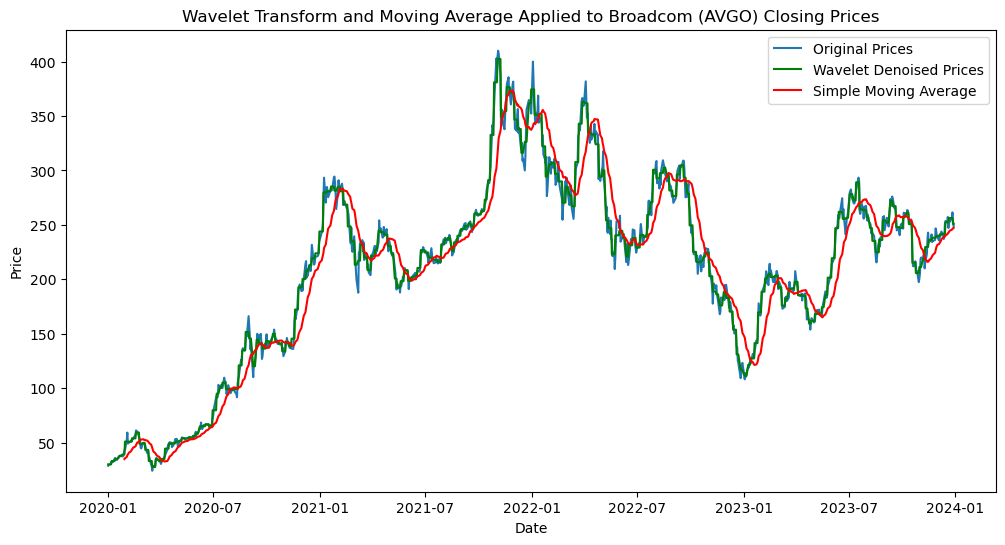

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pywt
import yfinance as yf

# Fetching the historical data for Broadcom (AVGO)
ticker = 'TSLA'
data = yf.download(ticker, start='2020-01-01', end='2024-01-01')
prices = data['Close'].values

# Define the wavelet function (e.g., 'db1' for Daubechies 1)
wavelet = 'db1'

# Perform the wavelet transform
coeffs = pywt.wavedec(prices, wavelet, level=2)

# Zero out the detail coefficients
coeffs[1:] = [np.zeros_like(coeff) for coeff in coeffs[1:]]

# Reconstruct the signal using the approximation coefficients
reconstructed_signal = pywt.waverec(coeffs, wavelet)

# Ensure the reconstructed signal has the same length as the original prices
reconstructed_signal = reconstructed_signal[:len(prices)]

# Calculate the simple moving average
window_size = 20
sma = pd.Series(prices).rolling(window=window_size).mean().values

# Plot the original and wavelet-denoised data along with the simple moving average
plt.figure(figsize=(12, 6))
plt.plot(data.index, prices, label='Original Prices')
plt.plot(data.index, reconstructed_signal, label='Wavelet Denoised Prices', color='green')
plt.plot(data.index, sma, label='Simple Moving Average', color='red')
plt.title('Wavelet Transform and Moving Average Applied to Broadcom (AVGO) Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

